# CSS02 Simulation

## SIR, SEIR - Compartmental Model

Reference
1. https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
2. https://python.quantecon.org/sir_model.html

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

`np.linespace()`: 
* https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
* Return evenly spaced numbers over a specified interval.
* Returns num evenly spaced samples, calculated over the interval [start, stop].
* The endpoint of the interval can optionally be excluded.

In [11]:
# A grid of time points (in days)
t = np.linspace(0, 160, 160)
t

array([  0.        ,   1.00628931,   2.01257862,   3.01886792,
         4.02515723,   5.03144654,   6.03773585,   7.04402516,
         8.05031447,   9.05660377,  10.06289308,  11.06918239,
        12.0754717 ,  13.08176101,  14.08805031,  15.09433962,
        16.10062893,  17.10691824,  18.11320755,  19.11949686,
        20.12578616,  21.13207547,  22.13836478,  23.14465409,
        24.1509434 ,  25.1572327 ,  26.16352201,  27.16981132,
        28.17610063,  29.18238994,  30.18867925,  31.19496855,
        32.20125786,  33.20754717,  34.21383648,  35.22012579,
        36.22641509,  37.2327044 ,  38.23899371,  39.24528302,
        40.25157233,  41.25786164,  42.26415094,  43.27044025,
        44.27672956,  45.28301887,  46.28930818,  47.29559748,
        48.30188679,  49.3081761 ,  50.31446541,  51.32075472,
        52.32704403,  53.33333333,  54.33962264,  55.34591195,
        56.35220126,  57.35849057,  58.36477987,  59.37106918,
        60.37735849,  61.3836478 ,  62.38993711,  63.39

### SIR Model
* https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

![SIR_Model](./img/SIR.png)

In [12]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


### `odeint()`

`y = odeint(model, y0, t)`
1. `model`: Function name that returns derivative values at requested y and t values as dydt = model(y,t)
1. `y0`: Initial conditions of the differential states
1. `t`: Time points at which the solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported.

Reference: 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [13]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

array([  1.        ,   1.10562053,   1.22234204,   1.3513191 ,
         1.49382365,   1.65125635,   1.82515884,   2.01722707,
         2.22932557,   2.46350299,   2.7220086 ,   3.00730991,
         3.32211145,   3.66937465,   4.0523386 ,   4.47454174,
         4.93984426,   5.45245089,   6.01693383,   6.63825544,
         7.32178998,   8.0733439 ,   8.89917375,   9.80600063,
        10.80102005,  11.89190567,  13.08680509,  14.39432578,
        15.82350878,  17.38378769,  19.08492966,  20.93695584,
        22.95003759,  25.13436512,  27.49998545,  30.05660664,
        32.81336559,  35.77855836,  38.95933214,  42.3613401 ,
        45.98836366,  49.84190696,  53.92077275,  58.22063343,
        62.73361225,  67.44789302,  72.34738271,  77.41145123,
        82.61477151,  87.92728803,  93.31433477,  98.73691852,
       104.15218163, 109.51404327, 114.77400588, 119.88211691,
       124.78804762, 129.44224339, 133.79710874, 137.80816356,
       141.4351244 , 144.6428585 , 147.40216923, 149.69

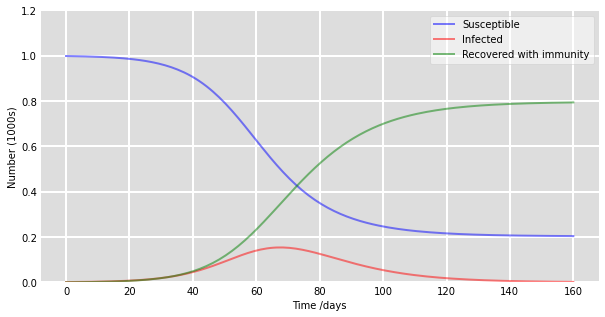

In [18]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(10, 5))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()